In [1]:
import requests
from bs4 import BeautifulSoup as bsp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

import json
import time
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [2]:
# PYTHON으로 SQLITE3의 DB에 데이터 담기
dbname='20210630_wadizDB_최종.db'
def insData(d, tblname='wadiztable'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from '+tblname+' where ncategory="'+d+'"'
        ckkey=cur.execute(sql).fetchall()
        if ckkey:
            return ckkey
#             print('{}',ckkey)



In [3]:
d = '푸드'
data = insData(d)
print(data[1][2])


[와디즈 단독] 지친 일상에 건강충전! 강력한 캐나다산 베리 습관  


In [4]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7
0,8236,푸드,[이게 마늘 꽃이라구요?] 입안 가득 풍미 팡! 마늘종 페스토,\n 우리집 빵도둑!!! 깊고 진한 풍미의 향연을 느낄 수 있는 '마늘종페스토...,114,"5,627,710",1125,https://www.wadiz.kr/web/campaign/detail/113318
1,8237,푸드,[와디즈 단독] 지친 일상에 건강충전! 강력한 캐나다산 베리 습관,\n 바쁜 현대인들의 건강을 충전해 줄 과일들만 쏙 모았어요! \n캐나다산 건...,55,"1,513,100",302,https://www.wadiz.kr/web/campaign/detail/111527
2,8238,푸드,[3차 앵콜] 갓 생산해 보내드리는 신선한 오징어! 올 여름 주전부리!,\n [앵콜 3차] 갓 생산해 보내드리는 신선한 국산 오징어!! 만능 촉촉오징...,4,"308,000",30,https://www.wadiz.kr/web/campaign/detail/119839
3,8239,푸드,[체리+자두] 체리?자두? 두과일이 합쳐진 7월 한정 신품종 나디아자두!,\n 체리와 자두가 만난 신품종 나디아 자두를 소개합니다! 7월 한달 만날 수...,505,"19,284,000",3856,https://www.wadiz.kr/web/campaign/detail/117627
4,8240,푸드,떡볶이에 명란이?!? 사장님 떡볶이에 무슨 짓을 한거에요?,"\n ""떡볶이에 대체 무슨 짓을 한 거냐구요?""\n매콤한 떡볶이와 명란이 만나...",132,"4,409,500",146,https://www.wadiz.kr/web/campaign/detail/115809
...,...,...,...,...,...,...,...,...
3067,11303,푸드,[앵콜펀딩] 사람은 효소와 공생합니다.,"\n 효소는 생명체가 아닌 물질이며, 사람은 효소와 공생합니다. #꽃송이버섯 ...",20,"1,339,400",167,https://www.wadiz.kr/web/campaign/detail/38696
3068,11304,푸드,한국을 대표하는 명품 독도 꽃새우,\n 대한민국을 대표하는 명품 독도꽃새우입니다. \n꽃보다 더 화려해서 더 맛...,100,"8,353,000",167,https://www.wadiz.kr/web/campaign/detail/63746
3069,11305,푸드,[인생디저트] 최초공개!! 떡후의방앗간 인절미 3종,\n 떡도 완벽한 디저트가 될 수있다.\r\n\r\n전통식품인 떡을 현대인의 ...,66,"1,675,600",167,https://www.wadiz.kr/web/campaign/detail/34611
3070,11306,푸드,[하루200원대] 오메가+비타민12종=단 1캡슐로 종결낸 영양소 신세계!,\n 오메가 + 12종의 비타민&미네랄 = 비현실적인 영양 성분 그러나 합리적...,215,"11,738,500",167,https://www.wadiz.kr/web/campaign/detail/107019


In [5]:
names = ['idx', 'category', 'title', 'content', 'supporter', 'amount', 'percent','key']
df.columns = names
df

,idx,category,title,content,supporter,amount,percent,key
0,8236,푸드,[이게 마늘 꽃이라구요?] 입안 가득 풍미 팡! 마늘종 페스토,\n 우리집 빵도둑!!! 깊고 진한 풍미의 향연을 느낄 수 있는 '마늘종페스토...,114,"5,627,710",1125,https://www.wadiz.kr/web/campaign/detail/113318
1,8237,푸드,[와디즈 단독] 지친 일상에 건강충전! 강력한 캐나다산 베리 습관,\n 바쁜 현대인들의 건강을 충전해 줄 과일들만 쏙 모았어요! \n캐나다산 건...,55,"1,513,100",302,https://www.wadiz.kr/web/campaign/detail/111527
2,8238,푸드,[3차 앵콜] 갓 생산해 보내드리는 신선한 오징어! 올 여름 주전부리!,\n [앵콜 3차] 갓 생산해 보내드리는 신선한 국산 오징어!! 만능 촉촉오징...,4,"308,000",30,https://www.wadiz.kr/web/campaign/detail/119839
3,8239,푸드,[체리+자두] 체리?자두? 두과일이 합쳐진 7월 한정 신품종 나디아자두!,\n 체리와 자두가 만난 신품종 나디아 자두를 소개합니다! 7월 한달 만날 수...,505,"19,284,000",3856,https://www.wadiz.kr/web/campaign/detail/117627
4,8240,푸드,떡볶이에 명란이?!? 사장님 떡볶이에 무슨 짓을 한거에요?,"\n ""떡볶이에 대체 무슨 짓을 한 거냐구요?""\n매콤한 떡볶이와 명란이 만나...",132,"4,409,500",146,https://www.wadiz.kr/web/campaign/detail/115809
...,...,...,...,...,...,...,...,...
3067,11303,푸드,[앵콜펀딩] 사람은 효소와 공생합니다.,"\n 효소는 생명체가 아닌 물질이며, 사람은 효소와 공생합니다. #꽃송이버섯 ...",20,"1,339,400",167,https://www.wadiz.kr/web/campaign/detail/38696
3068,11304,푸드,한국을 대표하는 명품 독도 꽃새우,\n 대한민국을 대표하는 명품 독도꽃새우입니다. \n꽃보다 더 화려해서 더 맛...,100,"8,353,000",167,https://www.wadiz.kr/web/campaign/detail/63746
3069,11305,푸드,[인생디저트] 최초공개!! 떡후의방앗간 인절미 3종,\n 떡도 완벽한 디저트가 될 수있다.\r\n\r\n전통식품인 떡을 현대인의 ...,66,"1,675,600",167,https://www.wadiz.kr/web/campaign/detail/34611
3070,11306,푸드,[하루200원대] 오메가+비타민12종=단 1캡슐로 종결낸 영양소 신세계!,\n 오메가 + 12종의 비타민&미네랄 = 비현실적인 영양 성분 그러나 합리적...,215,"11,738,500",167,https://www.wadiz.kr/web/campaign/detail/107019


In [6]:
len(data)


3072

In [7]:
encore = "앵콜"
df['label'] = 0

for i, title in enumerate(df['title']):
#     print(title)
#     print(i)
    if title.find(encore) > 0:
        df['label'].iloc[i] = 1


C:\Users\pc\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
df

,idx,category,title,content,supporter,amount,percent,key,label
0,8236,푸드,[이게 마늘 꽃이라구요?] 입안 가득 풍미 팡! 마늘종 페스토,\n 우리집 빵도둑!!! 깊고 진한 풍미의 향연을 느낄 수 있는 '마늘종페스토...,114,"5,627,710",1125,https://www.wadiz.kr/web/campaign/detail/113318,0
1,8237,푸드,[와디즈 단독] 지친 일상에 건강충전! 강력한 캐나다산 베리 습관,\n 바쁜 현대인들의 건강을 충전해 줄 과일들만 쏙 모았어요! \n캐나다산 건...,55,"1,513,100",302,https://www.wadiz.kr/web/campaign/detail/111527,0
2,8238,푸드,[3차 앵콜] 갓 생산해 보내드리는 신선한 오징어! 올 여름 주전부리!,\n [앵콜 3차] 갓 생산해 보내드리는 신선한 국산 오징어!! 만능 촉촉오징...,4,"308,000",30,https://www.wadiz.kr/web/campaign/detail/119839,1
3,8239,푸드,[체리+자두] 체리?자두? 두과일이 합쳐진 7월 한정 신품종 나디아자두!,\n 체리와 자두가 만난 신품종 나디아 자두를 소개합니다! 7월 한달 만날 수...,505,"19,284,000",3856,https://www.wadiz.kr/web/campaign/detail/117627,0
4,8240,푸드,떡볶이에 명란이?!? 사장님 떡볶이에 무슨 짓을 한거에요?,"\n ""떡볶이에 대체 무슨 짓을 한 거냐구요?""\n매콤한 떡볶이와 명란이 만나...",132,"4,409,500",146,https://www.wadiz.kr/web/campaign/detail/115809,0
...,...,...,...,...,...,...,...,...,...
3067,11303,푸드,[앵콜펀딩] 사람은 효소와 공생합니다.,"\n 효소는 생명체가 아닌 물질이며, 사람은 효소와 공생합니다. #꽃송이버섯 ...",20,"1,339,400",167,https://www.wadiz.kr/web/campaign/detail/38696,1
3068,11304,푸드,한국을 대표하는 명품 독도 꽃새우,\n 대한민국을 대표하는 명품 독도꽃새우입니다. \n꽃보다 더 화려해서 더 맛...,100,"8,353,000",167,https://www.wadiz.kr/web/campaign/detail/63746,0
3069,11305,푸드,[인생디저트] 최초공개!! 떡후의방앗간 인절미 3종,\n 떡도 완벽한 디저트가 될 수있다.\r\n\r\n전통식품인 떡을 현대인의 ...,66,"1,675,600",167,https://www.wadiz.kr/web/campaign/detail/34611,0
3070,11306,푸드,[하루200원대] 오메가+비타민12종=단 1캡슐로 종결낸 영양소 신세계!,\n 오메가 + 12종의 비타민&미네랄 = 비현실적인 영양 성분 그러나 합리적...,215,"11,738,500",167,https://www.wadiz.kr/web/campaign/detail/107019,0


In [9]:
df['text'] = df['title'] + df['content']

In [10]:
df['text'][0]

"[이게 마늘 꽃이라구요?] 입안 가득 풍미 팡! 마늘종 페스토\n    우리집 빵도둑!!! 깊고 진한 풍미의 향연을 느낄 수 있는 '마늘종페스토'\n그리고 '썬드라이토마토'입니다.\n로컬 농산물로 만들어가는 참신하고 매력적인 푸드를 지금 경험해보세요.\n    \n      지난 2월 용산 아이파크몰, 자투리마켓에서 깜짝 신제품을 첫 공개했습니다.정식 출시하기 전에 오프라인 마켓에서 집적 만나 뵙고 시식 평을 통해 더 좋은 제품으로 보완하고 싶었거든요!    한분 한분 시식평을 여쭈었고 정말 귀하고 값진 피드백들을 얻을 수 있었어요.첫 도전이었지만 뜨거운 반응 덕분에 마늘종 페스토는 전일 품절되었고 이후에도 구매 문의가 쇄도했어요.    많은 분들의 성원 덕분에 와디즈에 도전하기로 결심했고,소중한 피드백을 제품에 적!극! 반영하여 업그레이드하였습니다.온라인에서 정식으로 공개되는 마늘종페스토 & 썬드라이토마토를 와디즈에서 제일 처음 만나보세요.  마늘종으로 만든 페스토라구요?  네.. 푸드계의 신박기획..저희 쿠클리가 또 일냈습니다.이번 캐스팅은 마늘 농가에서도 가치를 외면받던 마늘종이에요. 마늘종은 마늘에 비하여 가치를 인정받지 못하는 농산물이지만사실은 우리가 먹는 마늘만큼 영양가도 풍부하고 엽산, 비타민 K 까지\xa0갖추고 있답니다.  저희는 '넥스트로컬'에 참여하여 의성 지역조사 중, 의성이 마늘 최대 생산지임에도 불구하고마늘 수확 전 대부분의 마늘종이 버려진다는 사실을 알게 되었습니다.     저번 펀딩에서 국내산 등급외 양파를 이용한 '양파 카라멜라이징'으로 만나 뵈었던 것 기억하시나요?\x08\x08이번에도 농산물의 새로운 가치를 전파하기 위하여 저희가 나섰습니다.    만족도 5.0 의 자부심으로 다시 돌아온 두 번째 프로젝트는\xa0마늘종을 이용한\xa0'마늘종페스토'에요! 국내 농산물의 새로운 가치를 또 한 번 맛있게 소개해드릴께요. (쿠~야호!!!)   재택근무가 많아지고 주말에도 집에서 보내는 날이 많아진 요즘 시국!나를 위한 근사한 홈브

<AxesSubplot:>

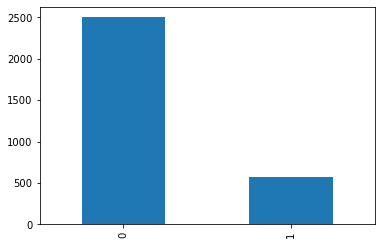

In [11]:
df['label'].value_counts().plot(kind = 'bar')

In [12]:
print(df.isnull().values.any())

False


In [13]:
!pip install nltk

In [14]:
from konlpy.tag import Kkma
kkma=Kkma()
# 정수 인코딩
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize,WhitespaceTokenizer,WordPunctTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:

def makeWmap(txt,mc_num=100):
    # 전처리
    txt=txt.lower()
    #stopword
    
    #filtering
    
    # 한글 형태소 분석
    kps=kkma.pos(txt)
    kp=[k[0] for k in kps]
    nltkkr=' '.join(kp) # 단어 join
    nltkkr # 한국어의 구조 영어화
    words=word_tokenize(nltkkr)
    wfreq=FreqDist(words) # 단어:언급횟수
    mostcom=wfreq.most_common(mc_num) # 가장많이 언급된 100개
    return mostcom

In [16]:
def tknWord(txt):
    kkma=Kkma()
    kpos=kkma.pos(txt)
    cate=['NNG','MAG','VV','NNP','NNB','VA','VCP','VCN','MAC']
    tkn=[]
    #print(kpos)
    for k in kpos:
        if(k[1] in cate):
            if(len(k[0])>1):
                tkn.append(k[0])
    return tkn

In [17]:
res = df['text'].loc[:10]

In [18]:
res

0     [이게 마늘 꽃이라구요?] 입안 가득 풍미 팡! 마늘종 페스토\n    우리집 빵도...
1     [와디즈 단독] 지친 일상에 건강충전! 강력한 캐나다산 베리 습관  \n    바쁜...
2     [3차 앵콜] 갓 생산해 보내드리는 신선한 오징어! 올 여름 주전부리!\n    [...
3     [체리+자두] 체리?자두? 두과일이 합쳐진 7월 한정 신품종 나디아자두!\n    ...
4      떡볶이에 명란이?!? 사장님 떡볶이에 무슨 짓을 한거에요? \n    "떡볶이에 ...
5     [술꾼, 알쓰 다모여~] 단 10초면 소주1잔이 하이볼이 되는 기적\n    술꾼들...
6     [2분 조리끝] 마라카레 최초출시ㅣ이제 휘카레만 찾게 될 거예요\n    마라덕후,...
7     [만족도4.8 앵콜] 올 여름, 내 몸을 가꿔 줄 2kcal 유럽대란템!\n    ...
8     [고단백#17g] 해동없이 1초만에 쓱! 바로 먹는 닭가슴살 비엔나\n    언제 ...
9     달달한 과즙 팡팡! 과일옥수수! 제주도 초당옥수수, 백초당옥수수!\n    과일보다...
10    [무료배송]밥도둑/술도둑으로 탄생한 낙지와 쭈꾸미ㅣ불맛나는 불쭈낙볶음\n    따로...
Name: text, dtype: object

In [19]:
rn=np.ravel(res)
totsen=[]
for r in rn:
    sen=' '.join(tknWord(r))
    totsen.append(sen)
totalw =' '.join(totsen)
    

In [20]:
sen

'무료 배송 밥도둑 도둑 탄생 낙지 볶음 따로 맛있 낙지 쭈꾸미 만나 탱탱 캠핑 어울리 맛있 밥도둑 도둑 볶음 와디 최초 공개 낙지 쭈꾸미 엄선 조리 쭈꾸미 낙지 줄어들 탱글탱글 감이 유지 원물 수분 빼주 원물 수분 많이 머금 그만큼 중량 조리 시모 쪼그라들 그리고 분말 특제 가루 쭈꾸미 낙지 합하 특제 분말 가루 양념 겉돌 원물 베이 양념 그리고 정온 냉장 시간 배합 숙성 시간 가지 그렇 배합 시간 숙성 원물 상형 특제 양념 소스 배합 들어가 그리고 한번 정온 냉장 시간 배합 숙성 시간 가지 수년 만들 노하우 자체 개발 특제 비법 양념 사용 만들 때문 좋아하 매운맛 보통 신라 매운맛 감기 맛있 정도 아니 매운맛 드시 보시 권장 선택 후회 야식 볶음 드시 보신 브랜드 제품 한번 드시 보시 권장 어떻 다르 원물 얼마나 분명 느끼 야식 호불호 갈리 테스트 가지 브랜드 절대 아니 노하우 만들 진짜 맛있 야식 특제 양념 원물 그리고 배합 공정 거치 남다르 제조 공법 좋아하 맛있 자랑 요식업 업체 가공 식품 공급 손님 내놓 대하 고민 무수히 많이 제조사 비교 선택 맛과 서비스 우선 요식 업체 사장님 손잡 매년 거래 그만큼 대하 검증 반증 시간 축적 노하우 바탕 검증 탄생 불호 정말 맛있 매운맛 자랑 우선 당연히 인증 제조사 식품 제조 공장 안되 인증 사항 작업자 위생 관리 위생 대하 엄격 기준 가장 중요 생각 번째 약속 모든 원물 단계 세척 과정 거치 아주 중요 단계 세척 과정 절대로 우선 원물 망가지 공기 방울 때리 워터젯 버블 시스템 세척 세척 원물 물줄기 샤워 샤워 마치 원물 또다시 워터젯 버블 세척 진행하 정도 사실 사람 보다 훨씬 위생적 세척 하지만 아직 끝나 세척 과정 충분히 세척 원물 마지막 샤워 먹거리 준비 이렇게 세척 과정 거치 원물 마지막 선별 작업 이루어지 선별 관리자 위생 복장 완벽 갖추 혹시 모르 이물질 걸르 선별 작업 모두 거치 비로소 식품 만들 준비 시작 먹거리 무조건 안전 만들 신념 정량 소분 위하 자체 개발 도입 시스템 직접 설계 기기 기

In [21]:
totsen

['마늘 가득 풍미 마늘종 우리집 도둑 진하 풍미 향연 느끼 마늘종 그리고 드라이 토마토 로컬 농산물 만들 매력적 푸드 지금 경험 지나 아이 파크 자투리 마켓 깜짝 제품 공개 정식 출시 오프 라인 마켓 집적 시식 통하 제품 보완 시식 여쭈 정말 귀하 값지 피드백 도전 뜨겁 반응 덕분 마늘종 전일 품절 이후 구매 문의 쇄도 성원 덕분 도전 결심 피드백 제품 반영 업그레이드 온라인 정식 공개 마늘 드라이 토마토 제일 처음 마늘종 만들 푸드 기획 이번 캐스팅 마늘 농가 가치 외면 마늘 마늘종 마늘 비하 가치 인정받 농산물 사실 마늘 영양가 엽산 비타민 갖추 넥스트 참여 의성 지역 조사 의성 마늘 최대 생산지 마늘 수확 대부분 마늘종 버리 사실 저번 국내산 등급 양파 이용 라이징 기억 이번 농산물 새롭 가치 전파 위하 나서 만족도 자부심 다시 돌아오 번째 프로젝트 마늘 이용 마늘종 국내 농산물 새롭 가치 맛있 소개 재택근무 주말 보내 요즘 시국 위하 떠세 이면 스푼 풍미 마늘종 드라이 토마토 조합 정말 다양 메뉴 활용 시판 소스 식상 벗어나 손쉽 요리 추천 열처리 유통 기한 짧아지 원재료 본연 차원 다르 고집 현상 초록 빛깔 신선 만들 토이기 때문 마늘 바지 또한 느끼 노력 자체 생산 생산 통하 만들 만들 러버 서포터 와디 등장 얼르 가장 맛있 마늘종 드라이 토마토 디테일 원재료 소개 합성 첨가물 착향료 일체 재료 하나하나 따지 집적 수급 건강 농산물 재료 담기 마늘종 마늘종 바지 레몬 더하 더욱 로스 고소 느끼 소금 최소화 그라나 마산 가지 치즈 사용 때문 그냥 재료 섞이 조절 드라이 토마토 유기농 대추 방울 토마토 정성껏 건조 사용하 토마토 시간 알맞 온도 건조 본연 극대화 수분 날아가 감도 변해 토마토 영양가 엑스트라 버진 올리브유 마늘 바지 허브 함께 절이 향긋 감칠맛 느끼 서울시 청년 로컬 상생 프로젝트 넥스트 로컬 선정 국내 농가 협업 집적 주재료 수급 국내산 농산물 만들 이탈 매력적 제품 공유 주방 철저 위생 관리 자체 생산 사활 때문 와디 통하 적정 생

In [22]:
totalw

'마늘 가득 풍미 마늘종 우리집 도둑 진하 풍미 향연 느끼 마늘종 그리고 드라이 토마토 로컬 농산물 만들 매력적 푸드 지금 경험 지나 아이 파크 자투리 마켓 깜짝 제품 공개 정식 출시 오프 라인 마켓 집적 시식 통하 제품 보완 시식 여쭈 정말 귀하 값지 피드백 도전 뜨겁 반응 덕분 마늘종 전일 품절 이후 구매 문의 쇄도 성원 덕분 도전 결심 피드백 제품 반영 업그레이드 온라인 정식 공개 마늘 드라이 토마토 제일 처음 마늘종 만들 푸드 기획 이번 캐스팅 마늘 농가 가치 외면 마늘 마늘종 마늘 비하 가치 인정받 농산물 사실 마늘 영양가 엽산 비타민 갖추 넥스트 참여 의성 지역 조사 의성 마늘 최대 생산지 마늘 수확 대부분 마늘종 버리 사실 저번 국내산 등급 양파 이용 라이징 기억 이번 농산물 새롭 가치 전파 위하 나서 만족도 자부심 다시 돌아오 번째 프로젝트 마늘 이용 마늘종 국내 농산물 새롭 가치 맛있 소개 재택근무 주말 보내 요즘 시국 위하 떠세 이면 스푼 풍미 마늘종 드라이 토마토 조합 정말 다양 메뉴 활용 시판 소스 식상 벗어나 손쉽 요리 추천 열처리 유통 기한 짧아지 원재료 본연 차원 다르 고집 현상 초록 빛깔 신선 만들 토이기 때문 마늘 바지 또한 느끼 노력 자체 생산 생산 통하 만들 만들 러버 서포터 와디 등장 얼르 가장 맛있 마늘종 드라이 토마토 디테일 원재료 소개 합성 첨가물 착향료 일체 재료 하나하나 따지 집적 수급 건강 농산물 재료 담기 마늘종 마늘종 바지 레몬 더하 더욱 로스 고소 느끼 소금 최소화 그라나 마산 가지 치즈 사용 때문 그냥 재료 섞이 조절 드라이 토마토 유기농 대추 방울 토마토 정성껏 건조 사용하 토마토 시간 알맞 온도 건조 본연 극대화 수분 날아가 감도 변해 토마토 영양가 엑스트라 버진 올리브유 마늘 바지 허브 함께 절이 향긋 감칠맛 느끼 서울시 청년 로컬 상생 프로젝트 넥스트 로컬 선정 국내 농가 협업 집적 주재료 수급 국내산 농산물 만들 이탈 매력적 제품 공유 주방 철저 위생 관리 자체 생산 사활 때문 와디 통하 적정 생산

In [23]:
Xdata=df[['text']].values
Ydata=df[['label']].values

In [24]:
num=len(Xdata)*0.2
num = int(num)
num

614

In [25]:
X_train=np.array(Xdata[:-num])
Y_train=np.array(Ydata[:-num])
x_test=np.array(Xdata[-num:])
y_test=np.array(Ydata[-num:])

In [26]:
X_train[0]

array(["[이게 마늘 꽃이라구요?] 입안 가득 풍미 팡! 마늘종 페스토\n    우리집 빵도둑!!! 깊고 진한 풍미의 향연을 느낄 수 있는 '마늘종페스토'\n그리고 '썬드라이토마토'입니다.\n로컬 농산물로 만들어가는 참신하고 매력적인 푸드를 지금 경험해보세요.\n    \n      지난 2월 용산 아이파크몰, 자투리마켓에서 깜짝 신제품을 첫 공개했습니다.정식 출시하기 전에 오프라인 마켓에서 집적 만나 뵙고 시식 평을 통해 더 좋은 제품으로 보완하고 싶었거든요!    한분 한분 시식평을 여쭈었고 정말 귀하고 값진 피드백들을 얻을 수 있었어요.첫 도전이었지만 뜨거운 반응 덕분에 마늘종 페스토는 전일 품절되었고 이후에도 구매 문의가 쇄도했어요.    많은 분들의 성원 덕분에 와디즈에 도전하기로 결심했고,소중한 피드백을 제품에 적!극! 반영하여 업그레이드하였습니다.온라인에서 정식으로 공개되는 마늘종페스토 & 썬드라이토마토를 와디즈에서 제일 처음 만나보세요.  마늘종으로 만든 페스토라구요?  네.. 푸드계의 신박기획..저희 쿠클리가 또 일냈습니다.이번 캐스팅은 마늘 농가에서도 가치를 외면받던 마늘종이에요. 마늘종은 마늘에 비하여 가치를 인정받지 못하는 농산물이지만사실은 우리가 먹는 마늘만큼 영양가도 풍부하고 엽산, 비타민 K 까지\xa0갖추고 있답니다.  저희는 '넥스트로컬'에 참여하여 의성 지역조사 중, 의성이 마늘 최대 생산지임에도 불구하고마늘 수확 전 대부분의 마늘종이 버려진다는 사실을 알게 되었습니다.     저번 펀딩에서 국내산 등급외 양파를 이용한 '양파 카라멜라이징'으로 만나 뵈었던 것 기억하시나요?\x08\x08이번에도 농산물의 새로운 가치를 전파하기 위하여 저희가 나섰습니다.    만족도 5.0 의 자부심으로 다시 돌아온 두 번째 프로젝트는\xa0마늘종을 이용한\xa0'마늘종페스토'에요! 국내 농산물의 새로운 가치를 또 한 번 맛있게 소개해드릴께요. (쿠~야호!!!)   재택근무가 많아지고 주말에도 집에서 보내는 날이 많아진 요즘 시국!나를 위한